In [82]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import func
from sqlalchemy import create_engine, inspect

In [39]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [41]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
#class measurement(Base):

Base.prepare(autoload_with=engine)

In [43]:
# Print all of the classes mapped to the base

Base.classes.keys()

['measurement', 'station']

In [44]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement=Base.classes.measurement
Station=Base.classes.station

In [45]:
# Create a session
session=Session(engine)

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

2016-08-23


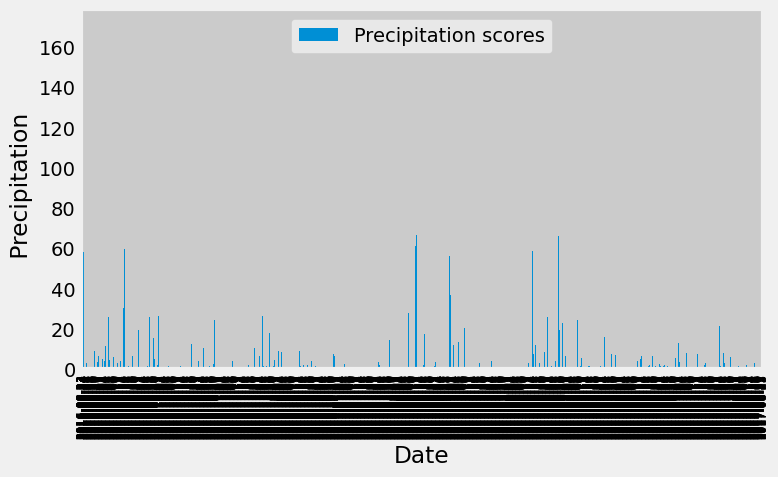

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
date_last=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017, 8, 23) - dt.timedelta(days=365)
print (year_ago)
# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.date).filter(Measurement.date.between('2016-08-23' , '2017-08-23'))

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.read_sql(session.query(Measurement.prcp).filter(Measurement.date.between('2016-08-23', '2017-08-23')).statement,session.bind)
Date_df=pd.read_sql(session.query(Measurement.date).filter(Measurement.date.between('2016-08-23', '2017-08-23')).statement,session.bind)
prcp_last_12_months=pd.merge(Date_df, prcp_df, left_index=True, right_index=True)
#prcp_last_12_months.rename({'prcp': 'Precipitation scores','date':'Date'}, axis=1, inplace=True)
prcp_last_12_months_df = pd.DataFrame({
    "Date": prcp_last_12_months.date,
    "Precipitation scores": prcp_last_12_months.prcp
})
prcp_last_12_months_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_last_12_months_df.sort_values(by=['Date'], inplace=True, ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_chart = prcp_last_12_months_df.plot(kind="bar", figsize=(8,5))
prcp_chart.set_xlabel("Date")
prcp_chart.set_ylabel(" Precipitation")
plt.xticks(rotation=90, fontsize='xx-small')
plt.tight_layout()
plt.show()


In [49]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_last_12_months['Precipitation scores'].describe()

count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: Precipitation scores, dtype: float64

# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number of stations in the dataset
station = session.query(Station.station)

In [58]:
station.distinct().count()

9

In [94]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#session.query(Station, Measurement).filter(Station.station == Measurement.station.limit10.all()
same_station_prcp_df=pd.read_sql(session.query(Station, Measurement).filter(Station.station == Measurement.station).statement,session.bind)
same_station_reduced = same_station_prcp_df.drop(columns=['id', 'id_1','station_1'])
same_station_reduced

,station,name,latitude,longitude,elevation,date,prcp,tobs
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,2010-01-01,2.0,18.3
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,2010-01-02,0.0,17.2
2,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,2010-01-03,0.0,23.3
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,2010-01-04,0.0,24.4
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,2010-01-06,NaN,22.8
...,...,...,...,...,...,...,...,...
19545,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,46.449,2017-08-19,2.3,21.7
19546,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,46.449,2017-08-20,NaN,25.6
19547,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,46.449,2017-08-21,14.2,24.4
19548,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,46.449,2017-08-22,12.7,24.4


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()
